# Support Vector Machine

In [39]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()

In [6]:
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.float64)

In [11]:
svm_clf = Pipeline([('scaler',StandardScaler()),
                    ('linear_svc',LinearSVC(C=1,loss='hinge'))])

In [12]:
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [13]:
svm_clf.predict([[5.5,1.7]])

array([1.])

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features

## Non-linear SVM classification

In [32]:
make_moons=datasets.make_moons(n_samples=100,noise=0.15,random_state=42)
make_moons

(array([[ 1.61383833, -0.49115086],
        [ 0.08984723,  0.50439056],
        [ 0.74721047, -0.36911116],
        [-1.10174514,  0.23685641],
        [-0.72871455,  0.14652347],
        [-0.65891281,  0.857088  ],
        [ 0.22828266,  0.73453868],
        [ 1.39439184, -0.45063627],
        [ 0.87158283,  0.70852888],
        [ 0.88304472, -0.12658445],
        [ 0.38220326,  0.76957897],
        [-0.32279169,  0.92145523],
        [ 1.29900621, -0.64914275],
        [-0.63569974,  0.91873422],
        [ 1.96899387,  0.297549  ],
        [ 1.21073294,  0.37721455],
        [ 1.13998191, -0.36088456],
        [ 1.06805159, -0.53460667],
        [ 0.49598571,  0.66135542],
        [-0.26038715,  0.88295876],
        [-0.06516219,  0.13092506],
        [ 1.87005845, -0.18659309],
        [ 0.03146515,  0.79868048],
        [-1.03151461,  0.35788726],
        [ 0.45814234,  0.00308109],
        [ 0.40767679,  0.9574049 ],
        [-0.9379972 ,  0.46846678],
        [ 2.02675758,  0.090

In [33]:
X=make_moons[0]
y=make_moons[1]

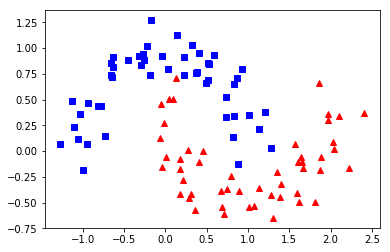

In [38]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'r^')
plt.show()

In [42]:
poly_svm_clf = Pipeline([('poly_features',PolynomialFeatures(degree=3)),
                         ('scaler',StandardScaler()),
                         ('svm_clf',LinearSVC(C=10,loss='hinge',random_state=42))])

In [44]:
poly_svm_clf.fit(X,y)

C:\Users\marpa\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [48]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [45]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

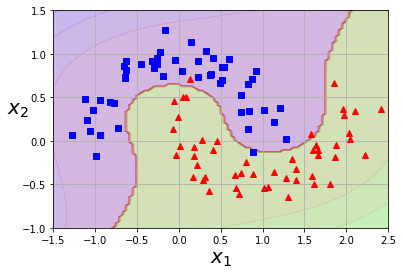

In [49]:
plot_predictions(poly_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

### Gaussian RBF kernel

$$\phi_\gamma(x,l)=exp(-\gamma||x-l||^2)$$

$\gamma$ : Hyperparameter
$l$ : Landmark

In [50]:
rbf_svm_clf = Pipeline([('scaler',StandardScaler()),
                        ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001))])

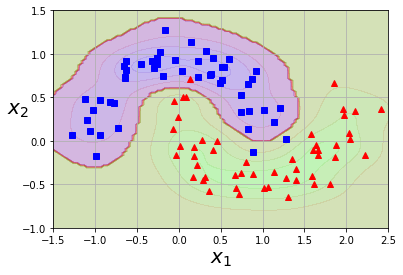

In [52]:
rbf_svm_clf.fit(X,y)

plot_predictions(rbf_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

In [53]:
rbf_svm_clf = Pipeline([('scaler',StandardScaler()),
                        ('svm_clf',SVC(kernel='rbf',gamma=5,C=1000))])

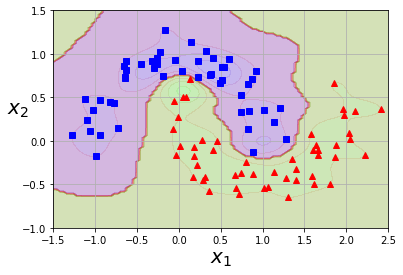

In [54]:
rbf_svm_clf.fit(X,y)

plot_predictions(rbf_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

Increasing gamma makes the bell-shape curve narrower (see the left plot of Figure 5-8), and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter).